In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

## PART C

In [3]:
# Split data into predictors and target
df_columns = df.columns

predictors = df[df_columns[df_columns != 'Strength']] # independen
target = df['Strength'] # dependent

In [4]:
print(predictors.shape)
print(target.shape)

(1030, 8)
(1030,)


In [5]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.30, random_state=1)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 309
number of training samples: 721


In [7]:
# Definition of the regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(8,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [8]:
# List for mean squared error cumulation
Means = []

# looping 50 times over model
for i in range(50):

    # build the model
    model = regression_model()

    # fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)

    # evaluate the model
    mean = model.evaluate(X_test, y_test, verbose=0)
    Means.append(mean)

Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 1522.3502 - val_loss: 1550.6343
Epoch 2/100
 - 0s - loss: 1509.1972 - val_loss: 1536.8223
Epoch 3/100
 - 0s - loss: 1496.0221 - val_loss: 1522.6981
Epoch 4/100
 - 0s - loss: 1482.3756 - val_loss: 1508.4256
Epoch 5/100
 - 0s - loss: 1468.6575 - val_loss: 1492.8280
Epoch 6/100
 - 0s - loss: 1453.6671 - val_loss: 1476.8493
Epoch 7/100
 - 0s - loss: 1438.0278 - val_loss: 1459.4363
Epoch 8/100
 - 0s - loss: 1421.0855 - val_loss: 1440.6397
Epoch 9/100
 - 0s - loss: 1402.7327 - val_loss: 1420.3789
Epoch 10/100
 - 0s - loss: 1382.4754 - val_loss: 1398.3296
Epoch 11/100
 - 0s - loss: 1360.3087 - val_loss: 1374.0861
Epoch 12/100
 - 0s - loss: 1335.8994 - val_loss: 1347.5543
Epoch 13/100
 - 0s - loss: 1309.3315 - val_loss: 1318.8422
Epoch 14/100
 - 0s - loss: 1281.1518 - val_loss: 1287.5014
Epoch 15/100
 - 0s - loss: 1250.0638 - val_loss: 1254.7717
Epoch 16/100
 - 0s - loss: 1217.2744 - val_loss: 1220.3416
Epoch 17/100
 - 0s 

Epoch 42/100
 - 0s - loss: 479.5566 - val_loss: 484.9370
Epoch 43/100
 - 0s - loss: 456.9568 - val_loss: 463.5373
Epoch 44/100
 - 0s - loss: 435.6174 - val_loss: 443.2904
Epoch 45/100
 - 0s - loss: 415.6414 - val_loss: 424.4191
Epoch 46/100
 - 0s - loss: 396.6237 - val_loss: 407.0936
Epoch 47/100
 - 0s - loss: 379.2796 - val_loss: 390.0909
Epoch 48/100
 - 0s - loss: 362.4984 - val_loss: 375.2063
Epoch 49/100
 - 0s - loss: 347.3023 - val_loss: 361.5863
Epoch 50/100
 - 0s - loss: 333.0841 - val_loss: 348.9828
Epoch 51/100
 - 0s - loss: 319.8869 - val_loss: 337.4057
Epoch 52/100
 - 0s - loss: 307.8886 - val_loss: 326.5082
Epoch 53/100
 - 0s - loss: 296.6961 - val_loss: 316.9288
Epoch 54/100
 - 0s - loss: 286.2796 - val_loss: 308.3811
Epoch 55/100
 - 0s - loss: 276.9541 - val_loss: 300.3690
Epoch 56/100
 - 0s - loss: 268.3614 - val_loss: 292.9768
Epoch 57/100
 - 0s - loss: 260.3478 - val_loss: 286.4212
Epoch 58/100
 - 0s - loss: 253.1763 - val_loss: 280.7117
Epoch 59/100
 - 0s - loss: 246.

 - 0s - loss: 165.0550 - val_loss: 192.7523
Epoch 85/100
 - 0s - loss: 163.2108 - val_loss: 190.9983
Epoch 86/100
 - 0s - loss: 161.3610 - val_loss: 189.3229
Epoch 87/100
 - 0s - loss: 159.6191 - val_loss: 187.7177
Epoch 88/100
 - 0s - loss: 157.8566 - val_loss: 186.1189
Epoch 89/100
 - 0s - loss: 156.1343 - val_loss: 184.5404
Epoch 90/100
 - 0s - loss: 154.5149 - val_loss: 182.6586
Epoch 91/100
 - 0s - loss: 152.8489 - val_loss: 181.1830
Epoch 92/100
 - 0s - loss: 151.1865 - val_loss: 179.4878
Epoch 93/100
 - 0s - loss: 149.5235 - val_loss: 177.9893
Epoch 94/100
 - 0s - loss: 147.9531 - val_loss: 176.5748
Epoch 95/100
 - 0s - loss: 146.4826 - val_loss: 175.0310
Epoch 96/100
 - 0s - loss: 144.9017 - val_loss: 173.6418
Epoch 97/100
 - 0s - loss: 143.4008 - val_loss: 172.0383
Epoch 98/100
 - 0s - loss: 141.9239 - val_loss: 170.6350
Epoch 99/100
 - 0s - loss: 140.5687 - val_loss: 169.1419
Epoch 100/100
 - 0s - loss: 139.2816 - val_loss: 167.8674
Train on 721 samples, validate on 309 sampl

Epoch 26/100
 - 0s - loss: 882.2004 - val_loss: 893.0575
Epoch 27/100
 - 0s - loss: 846.4179 - val_loss: 857.2166
Epoch 28/100
 - 0s - loss: 810.7588 - val_loss: 822.2040
Epoch 29/100
 - 0s - loss: 776.3561 - val_loss: 787.2238
Epoch 30/100
 - 0s - loss: 741.9868 - val_loss: 753.0077
Epoch 31/100
 - 0s - loss: 708.3259 - val_loss: 719.9596
Epoch 32/100
 - 0s - loss: 675.6639 - val_loss: 688.4460
Epoch 33/100
 - 0s - loss: 644.2851 - val_loss: 656.9296
Epoch 34/100
 - 0s - loss: 613.3418 - val_loss: 626.9689
Epoch 35/100
 - 0s - loss: 583.7086 - val_loss: 597.6019
Epoch 36/100
 - 0s - loss: 554.7072 - val_loss: 569.5500
Epoch 37/100
 - 0s - loss: 526.8775 - val_loss: 543.2002
Epoch 38/100
 - 0s - loss: 500.6838 - val_loss: 516.5704
Epoch 39/100
 - 0s - loss: 474.8618 - val_loss: 492.2356
Epoch 40/100
 - 0s - loss: 450.8602 - val_loss: 469.3268
Epoch 41/100
 - 0s - loss: 428.1885 - val_loss: 448.0963
Epoch 42/100
 - 0s - loss: 406.9781 - val_loss: 428.0418
Epoch 43/100
 - 0s - loss: 387.

Epoch 69/100
 - 0s - loss: 186.8163 - val_loss: 231.9780
Epoch 70/100
 - 0s - loss: 184.9489 - val_loss: 230.2230
Epoch 71/100
 - 0s - loss: 183.1541 - val_loss: 228.3993
Epoch 72/100
 - 0s - loss: 181.4493 - val_loss: 226.7110
Epoch 73/100
 - 0s - loss: 179.6668 - val_loss: 225.1332
Epoch 74/100
 - 0s - loss: 178.0480 - val_loss: 223.3475
Epoch 75/100
 - 0s - loss: 176.5402 - val_loss: 221.6035
Epoch 76/100
 - 0s - loss: 174.8179 - val_loss: 219.7530
Epoch 77/100
 - 0s - loss: 173.2343 - val_loss: 218.0794
Epoch 78/100
 - 0s - loss: 171.7605 - val_loss: 216.5024
Epoch 79/100
 - 0s - loss: 170.2209 - val_loss: 214.8421
Epoch 80/100
 - 0s - loss: 168.7083 - val_loss: 213.3959
Epoch 81/100
 - 0s - loss: 167.2706 - val_loss: 211.7483
Epoch 82/100
 - 0s - loss: 165.8740 - val_loss: 210.1069
Epoch 83/100
 - 0s - loss: 164.5097 - val_loss: 208.3685
Epoch 84/100
 - 0s - loss: 163.1877 - val_loss: 206.6890
Epoch 85/100
 - 0s - loss: 161.7572 - val_loss: 205.1493
Epoch 86/100
 - 0s - loss: 160.

Epoch 11/100
 - 0s - loss: 1443.6053 - val_loss: 1474.1470
Epoch 12/100
 - 0s - loss: 1425.4319 - val_loss: 1455.2555
Epoch 13/100
 - 0s - loss: 1406.1069 - val_loss: 1434.8289
Epoch 14/100
 - 0s - loss: 1385.1521 - val_loss: 1413.1567
Epoch 15/100
 - 0s - loss: 1363.0096 - val_loss: 1390.1595
Epoch 16/100
 - 0s - loss: 1339.3959 - val_loss: 1365.6750
Epoch 17/100
 - 0s - loss: 1314.4671 - val_loss: 1339.4730
Epoch 18/100
 - 0s - loss: 1288.1928 - val_loss: 1312.4470
Epoch 19/100
 - 0s - loss: 1260.8689 - val_loss: 1284.1664
Epoch 20/100
 - 0s - loss: 1232.1546 - val_loss: 1254.6325
Epoch 21/100
 - 0s - loss: 1202.7952 - val_loss: 1223.7926
Epoch 22/100
 - 0s - loss: 1171.9507 - val_loss: 1192.7032
Epoch 23/100
 - 0s - loss: 1141.0227 - val_loss: 1160.5589
Epoch 24/100
 - 0s - loss: 1109.1652 - val_loss: 1127.4713
Epoch 25/100
 - 0s - loss: 1076.6090 - val_loss: 1094.1200
Epoch 26/100
 - 0s - loss: 1043.7297 - val_loss: 1059.8407
Epoch 27/100
 - 0s - loss: 1010.0236 - val_loss: 1025.61

Epoch 53/100
 - 0s - loss: 364.7872 - val_loss: 366.4586
Epoch 54/100
 - 0s - loss: 352.4479 - val_loss: 355.1075
Epoch 55/100
 - 0s - loss: 340.5056 - val_loss: 344.8856
Epoch 56/100
 - 0s - loss: 329.6296 - val_loss: 334.9018
Epoch 57/100
 - 0s - loss: 319.1039 - val_loss: 325.6619
Epoch 58/100
 - 0s - loss: 309.2693 - val_loss: 317.4709
Epoch 59/100
 - 0s - loss: 300.3916 - val_loss: 309.5455
Epoch 60/100
 - 0s - loss: 291.7433 - val_loss: 302.3019
Epoch 61/100
 - 0s - loss: 283.8164 - val_loss: 295.5178
Epoch 62/100
 - 0s - loss: 276.2889 - val_loss: 289.1089
Epoch 63/100
 - 0s - loss: 269.2252 - val_loss: 283.1084
Epoch 64/100
 - 0s - loss: 262.5743 - val_loss: 277.5674
Epoch 65/100
 - 0s - loss: 256.1841 - val_loss: 272.1704
Epoch 66/100
 - 0s - loss: 250.2930 - val_loss: 267.1893
Epoch 67/100
 - 0s - loss: 244.6739 - val_loss: 262.4346
Epoch 68/100
 - 0s - loss: 239.4206 - val_loss: 258.1630
Epoch 69/100
 - 0s - loss: 234.3526 - val_loss: 253.9403
Epoch 70/100
 - 0s - loss: 229.

 - 0s - loss: 147.2141 - val_loss: 183.7685
Epoch 96/100
 - 0s - loss: 146.4773 - val_loss: 183.0532
Epoch 97/100
 - 0s - loss: 145.7942 - val_loss: 182.1478
Epoch 98/100
 - 0s - loss: 145.1389 - val_loss: 181.3998
Epoch 99/100
 - 0s - loss: 144.5545 - val_loss: 180.5624
Epoch 100/100
 - 0s - loss: 143.8153 - val_loss: 179.9458
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 1544.7781 - val_loss: 1563.6327
Epoch 2/100
 - 0s - loss: 1524.7648 - val_loss: 1542.7300
Epoch 3/100
 - 0s - loss: 1504.5924 - val_loss: 1521.2675
Epoch 4/100
 - 0s - loss: 1483.6816 - val_loss: 1499.5503
Epoch 5/100
 - 0s - loss: 1462.4004 - val_loss: 1477.0788
Epoch 6/100
 - 0s - loss: 1440.2602 - val_loss: 1454.0509
Epoch 7/100
 - 0s - loss: 1417.6446 - val_loss: 1429.3103
Epoch 8/100
 - 0s - loss: 1394.0743 - val_loss: 1403.7955
Epoch 9/100
 - 0s - loss: 1369.3522 - val_loss: 1377.8078
Epoch 10/100
 - 0s - loss: 1344.1575 - val_loss: 1351.2055
Epoch 11/100
 - 0s - loss: 1318.3256 - val_

 - 0s - loss: 654.7217 - val_loss: 662.2942
Epoch 37/100
 - 0s - loss: 630.7434 - val_loss: 637.8385
Epoch 38/100
 - 0s - loss: 607.6287 - val_loss: 613.5865
Epoch 39/100
 - 0s - loss: 585.1813 - val_loss: 590.4638
Epoch 40/100
 - 0s - loss: 563.4370 - val_loss: 568.1810
Epoch 41/100
 - 0s - loss: 542.4143 - val_loss: 547.1218
Epoch 42/100
 - 0s - loss: 522.1698 - val_loss: 526.5898
Epoch 43/100
 - 0s - loss: 502.7414 - val_loss: 506.7951
Epoch 44/100
 - 0s - loss: 484.0427 - val_loss: 487.8539
Epoch 45/100
 - 0s - loss: 466.3021 - val_loss: 469.7794
Epoch 46/100
 - 0s - loss: 449.2895 - val_loss: 452.6828
Epoch 47/100
 - 0s - loss: 432.9836 - val_loss: 436.5803
Epoch 48/100
 - 0s - loss: 417.7816 - val_loss: 421.1055
Epoch 49/100
 - 0s - loss: 402.8483 - val_loss: 406.7898
Epoch 50/100
 - 0s - loss: 389.0712 - val_loss: 392.4722
Epoch 51/100
 - 0s - loss: 375.5650 - val_loss: 379.2985
Epoch 52/100
 - 0s - loss: 362.9187 - val_loss: 367.0744
Epoch 53/100
 - 0s - loss: 351.0486 - val_lo

Epoch 79/100
 - 0s - loss: 180.4218 - val_loss: 216.2179
Epoch 80/100
 - 0s - loss: 178.0107 - val_loss: 214.0759
Epoch 81/100
 - 0s - loss: 175.7110 - val_loss: 211.9884
Epoch 82/100
 - 0s - loss: 173.5598 - val_loss: 209.9872
Epoch 83/100
 - 0s - loss: 171.3634 - val_loss: 208.3225
Epoch 84/100
 - 0s - loss: 169.4062 - val_loss: 206.6672
Epoch 85/100
 - 0s - loss: 167.5806 - val_loss: 204.9315
Epoch 86/100
 - 0s - loss: 165.7882 - val_loss: 203.3842
Epoch 87/100
 - 0s - loss: 164.2108 - val_loss: 202.0077
Epoch 88/100
 - 0s - loss: 162.5837 - val_loss: 200.6987
Epoch 89/100
 - 0s - loss: 161.1500 - val_loss: 199.3971
Epoch 90/100
 - 0s - loss: 159.6202 - val_loss: 198.0875
Epoch 91/100
 - 0s - loss: 158.2326 - val_loss: 196.6649
Epoch 92/100
 - 0s - loss: 156.9204 - val_loss: 195.4134
Epoch 93/100
 - 0s - loss: 155.6659 - val_loss: 194.2086
Epoch 94/100
 - 0s - loss: 154.4519 - val_loss: 193.2057
Epoch 95/100
 - 0s - loss: 153.3492 - val_loss: 192.2667
Epoch 96/100
 - 0s - loss: 152.

Epoch 20/100
 - 0s - loss: 1005.1681 - val_loss: 993.1693
Epoch 21/100
 - 0s - loss: 972.6953 - val_loss: 957.9379
Epoch 22/100
 - 0s - loss: 939.0419 - val_loss: 923.3845
Epoch 23/100
 - 0s - loss: 905.3577 - val_loss: 888.4640
Epoch 24/100
 - 0s - loss: 871.1953 - val_loss: 853.8917
Epoch 25/100
 - 0s - loss: 837.3230 - val_loss: 819.2762
Epoch 26/100
 - 0s - loss: 803.4783 - val_loss: 784.3966
Epoch 27/100
 - 0s - loss: 769.8424 - val_loss: 750.2876
Epoch 28/100
 - 0s - loss: 736.5598 - val_loss: 717.0211
Epoch 29/100
 - 0s - loss: 704.0171 - val_loss: 684.6148
Epoch 30/100
 - 0s - loss: 671.8923 - val_loss: 653.4288
Epoch 31/100
 - 0s - loss: 640.9703 - val_loss: 622.5511
Epoch 32/100
 - 0s - loss: 610.6068 - val_loss: 592.9924
Epoch 33/100
 - 0s - loss: 580.7646 - val_loss: 564.8427
Epoch 34/100
 - 0s - loss: 552.2073 - val_loss: 538.4163
Epoch 35/100
 - 0s - loss: 525.5838 - val_loss: 511.9069
Epoch 36/100
 - 0s - loss: 498.7157 - val_loss: 488.3426
Epoch 37/100
 - 0s - loss: 474

Epoch 62/100
 - 0s - loss: 330.5274 - val_loss: 361.0763
Epoch 63/100
 - 0s - loss: 321.6532 - val_loss: 354.0094
Epoch 64/100
 - 0s - loss: 313.6225 - val_loss: 347.1777
Epoch 65/100
 - 0s - loss: 305.9434 - val_loss: 340.8430
Epoch 66/100
 - 0s - loss: 298.7486 - val_loss: 334.7501
Epoch 67/100
 - 0s - loss: 291.9761 - val_loss: 329.3607
Epoch 68/100
 - 0s - loss: 285.6600 - val_loss: 324.2374
Epoch 69/100
 - 0s - loss: 279.6143 - val_loss: 319.7378
Epoch 70/100
 - 0s - loss: 274.2187 - val_loss: 314.9079
Epoch 71/100
 - 0s - loss: 268.6645 - val_loss: 310.8689
Epoch 72/100
 - 0s - loss: 263.7736 - val_loss: 307.0285
Epoch 73/100
 - 0s - loss: 259.2059 - val_loss: 303.2691
Epoch 74/100
 - 0s - loss: 254.9052 - val_loss: 299.6761
Epoch 75/100
 - 0s - loss: 250.6786 - val_loss: 296.3529
Epoch 76/100
 - 0s - loss: 246.6487 - val_loss: 293.2914
Epoch 77/100
 - 0s - loss: 242.8625 - val_loss: 290.2974
Epoch 78/100
 - 0s - loss: 239.1105 - val_loss: 287.2832
Epoch 79/100
 - 0s - loss: 235.

Epoch 4/100
 - 0s - loss: 1488.0570 - val_loss: 1517.5470
Epoch 5/100
 - 0s - loss: 1470.1857 - val_loss: 1499.5443
Epoch 6/100
 - 0s - loss: 1451.7680 - val_loss: 1480.7481
Epoch 7/100
 - 0s - loss: 1432.5099 - val_loss: 1461.2280
Epoch 8/100
 - 0s - loss: 1412.7136 - val_loss: 1440.5928
Epoch 9/100
 - 0s - loss: 1391.6098 - val_loss: 1419.7790
Epoch 10/100
 - 0s - loss: 1370.3034 - val_loss: 1397.4173
Epoch 11/100
 - 0s - loss: 1347.4985 - val_loss: 1374.2773
Epoch 12/100
 - 0s - loss: 1324.0709 - val_loss: 1349.8414
Epoch 13/100
 - 0s - loss: 1299.3854 - val_loss: 1324.8906
Epoch 14/100
 - 0s - loss: 1274.3027 - val_loss: 1298.5548
Epoch 15/100
 - 0s - loss: 1247.7895 - val_loss: 1272.2779
Epoch 16/100
 - 0s - loss: 1221.0196 - val_loss: 1245.1374
Epoch 17/100
 - 0s - loss: 1193.0789 - val_loss: 1217.1067
Epoch 18/100
 - 0s - loss: 1164.9678 - val_loss: 1188.0613
Epoch 19/100
 - 0s - loss: 1135.9402 - val_loss: 1158.7622
Epoch 20/100
 - 0s - loss: 1106.7502 - val_loss: 1129.0777
Epo

Epoch 46/100
 - 0s - loss: 440.0545 - val_loss: 462.1877
Epoch 47/100
 - 0s - loss: 423.5374 - val_loss: 446.8039
Epoch 48/100
 - 0s - loss: 407.6754 - val_loss: 432.6013
Epoch 49/100
 - 0s - loss: 392.4068 - val_loss: 419.5531
Epoch 50/100
 - 0s - loss: 378.5609 - val_loss: 406.4872
Epoch 51/100
 - 0s - loss: 364.7470 - val_loss: 394.8672
Epoch 52/100
 - 0s - loss: 352.0566 - val_loss: 383.7502
Epoch 53/100
 - 0s - loss: 340.0809 - val_loss: 373.1369
Epoch 54/100
 - 0s - loss: 328.7111 - val_loss: 362.8155
Epoch 55/100
 - 0s - loss: 317.8445 - val_loss: 353.5451
Epoch 56/100
 - 0s - loss: 307.8212 - val_loss: 344.5688
Epoch 57/100
 - 0s - loss: 298.3355 - val_loss: 336.1167
Epoch 58/100
 - 0s - loss: 289.4335 - val_loss: 328.1799
Epoch 59/100
 - 0s - loss: 281.1059 - val_loss: 320.5844
Epoch 60/100
 - 0s - loss: 273.0857 - val_loss: 313.5427
Epoch 61/100
 - 0s - loss: 265.7557 - val_loss: 306.6262
Epoch 62/100
 - 0s - loss: 258.7958 - val_loss: 300.1386
Epoch 63/100
 - 0s - loss: 252.

Epoch 89/100
 - 0s - loss: 156.9735 - val_loss: 196.1089
Epoch 90/100
 - 0s - loss: 155.9762 - val_loss: 194.9974
Epoch 91/100
 - 0s - loss: 154.9333 - val_loss: 193.8913
Epoch 92/100
 - 0s - loss: 153.9743 - val_loss: 192.6204
Epoch 93/100
 - 0s - loss: 153.0376 - val_loss: 191.7058
Epoch 94/100
 - 0s - loss: 151.9842 - val_loss: 190.2382
Epoch 95/100
 - 0s - loss: 150.9784 - val_loss: 188.9506
Epoch 96/100
 - 0s - loss: 149.9823 - val_loss: 187.9201
Epoch 97/100
 - 0s - loss: 149.0438 - val_loss: 186.5791
Epoch 98/100
 - 0s - loss: 148.0966 - val_loss: 185.4492
Epoch 99/100
 - 0s - loss: 147.0674 - val_loss: 184.1101
Epoch 100/100
 - 0s - loss: 146.1979 - val_loss: 182.8570
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 1522.2110 - val_loss: 1545.2636
Epoch 2/100
 - 0s - loss: 1506.9108 - val_loss: 1529.0930
Epoch 3/100
 - 0s - loss: 1491.0111 - val_loss: 1511.6656
Epoch 4/100
 - 0s - loss: 1473.9958 - val_loss: 1493.3908
Epoch 5/100
 - 0s - loss: 1456.1886 -

Epoch 30/100
 - 0s - loss: 979.2023 - val_loss: 994.8485
Epoch 31/100
 - 0s - loss: 950.8099 - val_loss: 966.1475
Epoch 32/100
 - 0s - loss: 922.2797 - val_loss: 938.3911
Epoch 33/100
 - 0s - loss: 894.4077 - val_loss: 910.2350
Epoch 34/100
 - 0s - loss: 866.5489 - val_loss: 883.0876
Epoch 35/100
 - 0s - loss: 839.4755 - val_loss: 856.0046
Epoch 36/100
 - 0s - loss: 812.2863 - val_loss: 829.8261
Epoch 37/100
 - 0s - loss: 786.2751 - val_loss: 803.2852
Epoch 38/100
 - 0s - loss: 760.2108 - val_loss: 777.9265
Epoch 39/100
 - 0s - loss: 734.8746 - val_loss: 752.6067
Epoch 40/100
 - 0s - loss: 709.7131 - val_loss: 728.2154
Epoch 41/100
 - 0s - loss: 685.5363 - val_loss: 703.6741
Epoch 42/100
 - 0s - loss: 661.2979 - val_loss: 679.7886
Epoch 43/100
 - 0s - loss: 637.9406 - val_loss: 656.3054
Epoch 44/100
 - 0s - loss: 614.4976 - val_loss: 633.3840
Epoch 45/100
 - 0s - loss: 591.7486 - val_loss: 610.2032
Epoch 46/100
 - 0s - loss: 569.3789 - val_loss: 587.3390
Epoch 47/100
 - 0s - loss: 547.

 - 0s - loss: 206.2651 - val_loss: 227.4171
Epoch 73/100
 - 0s - loss: 203.6514 - val_loss: 225.6439
Epoch 74/100
 - 0s - loss: 201.1333 - val_loss: 224.2558
Epoch 75/100
 - 0s - loss: 198.9293 - val_loss: 223.0591
Epoch 76/100
 - 0s - loss: 196.6223 - val_loss: 221.6504
Epoch 77/100
 - 0s - loss: 194.8027 - val_loss: 220.3716
Epoch 78/100
 - 0s - loss: 192.6352 - val_loss: 219.1005
Epoch 79/100
 - 0s - loss: 190.8259 - val_loss: 217.7887
Epoch 80/100
 - 0s - loss: 189.0241 - val_loss: 216.6130
Epoch 81/100
 - 0s - loss: 187.2667 - val_loss: 215.5323
Epoch 82/100
 - 0s - loss: 185.6181 - val_loss: 214.5020
Epoch 83/100
 - 0s - loss: 183.9795 - val_loss: 213.3735
Epoch 84/100
 - 0s - loss: 182.4008 - val_loss: 212.3691
Epoch 85/100
 - 0s - loss: 180.9315 - val_loss: 211.3376
Epoch 86/100
 - 0s - loss: 179.4283 - val_loss: 210.2719
Epoch 87/100
 - 0s - loss: 178.0352 - val_loss: 209.0269
Epoch 88/100
 - 0s - loss: 176.6405 - val_loss: 207.9777
Epoch 89/100
 - 0s - loss: 175.2440 - val_lo

Epoch 14/100
 - 0s - loss: 1308.0502 - val_loss: 1315.6995
Epoch 15/100
 - 0s - loss: 1282.5932 - val_loss: 1288.4499
Epoch 16/100
 - 0s - loss: 1256.1642 - val_loss: 1259.7862
Epoch 17/100
 - 0s - loss: 1228.5125 - val_loss: 1229.5789
Epoch 18/100
 - 0s - loss: 1200.2301 - val_loss: 1198.0121
Epoch 19/100
 - 0s - loss: 1170.7763 - val_loss: 1166.8438
Epoch 20/100
 - 0s - loss: 1140.7745 - val_loss: 1134.7507
Epoch 21/100
 - 0s - loss: 1110.4483 - val_loss: 1101.8842
Epoch 22/100
 - 0s - loss: 1079.3548 - val_loss: 1068.9513
Epoch 23/100
 - 0s - loss: 1047.7836 - val_loss: 1036.6370
Epoch 24/100
 - 0s - loss: 1016.5524 - val_loss: 1002.9847
Epoch 25/100
 - 0s - loss: 984.6768 - val_loss: 969.3923
Epoch 26/100
 - 0s - loss: 952.8866 - val_loss: 935.8449
Epoch 27/100
 - 0s - loss: 920.6359 - val_loss: 902.7873
Epoch 28/100
 - 0s - loss: 889.0601 - val_loss: 869.8485
Epoch 29/100
 - 0s - loss: 857.2850 - val_loss: 837.4005
Epoch 30/100
 - 0s - loss: 825.9824 - val_loss: 804.0696
Epoch 31/

Epoch 56/100
 - 0s - loss: 301.5353 - val_loss: 287.9846
Epoch 57/100
 - 0s - loss: 291.0438 - val_loss: 278.3335
Epoch 58/100
 - 0s - loss: 281.6044 - val_loss: 269.4795
Epoch 59/100
 - 0s - loss: 272.3961 - val_loss: 261.9596
Epoch 60/100
 - 0s - loss: 264.2621 - val_loss: 254.8787
Epoch 61/100
 - 0s - loss: 256.6252 - val_loss: 248.7738
Epoch 62/100
 - 0s - loss: 249.7233 - val_loss: 242.5755
Epoch 63/100
 - 0s - loss: 243.1722 - val_loss: 237.3235
Epoch 64/100
 - 0s - loss: 237.3659 - val_loss: 232.4803
Epoch 65/100
 - 0s - loss: 231.8260 - val_loss: 228.3708
Epoch 66/100
 - 0s - loss: 226.7704 - val_loss: 224.6580
Epoch 67/100
 - 0s - loss: 222.2865 - val_loss: 221.2848
Epoch 68/100
 - 0s - loss: 217.8790 - val_loss: 218.2865
Epoch 69/100
 - 0s - loss: 213.9839 - val_loss: 215.5635
Epoch 70/100
 - 0s - loss: 210.3189 - val_loss: 213.2614
Epoch 71/100
 - 0s - loss: 207.0319 - val_loss: 210.9991
Epoch 72/100
 - 0s - loss: 203.8097 - val_loss: 209.1836
Epoch 73/100
 - 0s - loss: 200.

Epoch 99/100
 - 0s - loss: 135.3104 - val_loss: 178.9066
Epoch 100/100
 - 0s - loss: 134.3630 - val_loss: 177.5601
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 1545.9468 - val_loss: 1569.7407
Epoch 2/100
 - 0s - loss: 1529.2658 - val_loss: 1552.8281
Epoch 3/100
 - 0s - loss: 1512.9836 - val_loss: 1536.0148
Epoch 4/100
 - 0s - loss: 1496.7294 - val_loss: 1519.2811
Epoch 5/100
 - 0s - loss: 1480.6428 - val_loss: 1502.1014
Epoch 6/100
 - 0s - loss: 1464.2223 - val_loss: 1484.9312
Epoch 7/100
 - 0s - loss: 1447.5948 - val_loss: 1467.3880
Epoch 8/100
 - 0s - loss: 1430.5190 - val_loss: 1449.2522
Epoch 9/100
 - 0s - loss: 1412.7877 - val_loss: 1430.4620
Epoch 10/100
 - 0s - loss: 1394.2925 - val_loss: 1410.5943
Epoch 11/100
 - 0s - loss: 1374.8979 - val_loss: 1389.6806
Epoch 12/100
 - 0s - loss: 1354.4343 - val_loss: 1367.7776
Epoch 13/100
 - 0s - loss: 1332.5631 - val_loss: 1344.8682
Epoch 14/100
 - 0s - loss: 1309.9372 - val_loss: 1320.0188
Epoch 15/100
 - 0s - l

Epoch 40/100
 - 0s - loss: 552.5863 - val_loss: 564.4985
Epoch 41/100
 - 0s - loss: 526.5988 - val_loss: 538.4720
Epoch 42/100
 - 0s - loss: 500.9386 - val_loss: 514.4606
Epoch 43/100
 - 0s - loss: 476.5163 - val_loss: 491.6565
Epoch 44/100
 - 0s - loss: 453.7927 - val_loss: 469.8536
Epoch 45/100
 - 0s - loss: 432.1312 - val_loss: 449.3770
Epoch 46/100
 - 0s - loss: 411.9599 - val_loss: 430.0942
Epoch 47/100
 - 0s - loss: 392.8623 - val_loss: 411.9433
Epoch 48/100
 - 0s - loss: 374.8686 - val_loss: 395.2503
Epoch 49/100
 - 0s - loss: 358.0424 - val_loss: 379.7682
Epoch 50/100
 - 0s - loss: 342.0426 - val_loss: 365.4295
Epoch 51/100
 - 0s - loss: 327.3469 - val_loss: 352.1423
Epoch 52/100
 - 0s - loss: 313.7673 - val_loss: 339.6089
Epoch 53/100
 - 0s - loss: 300.8350 - val_loss: 328.2795
Epoch 54/100
 - 0s - loss: 289.2513 - val_loss: 317.3825
Epoch 55/100
 - 0s - loss: 278.3072 - val_loss: 307.7243
Epoch 56/100
 - 0s - loss: 268.4321 - val_loss: 298.8525
Epoch 57/100
 - 0s - loss: 259.

 - 0s - loss: 157.8562 - val_loss: 188.5531
Epoch 83/100
 - 0s - loss: 156.3729 - val_loss: 187.4178
Epoch 84/100
 - 0s - loss: 154.9243 - val_loss: 186.3311
Epoch 85/100
 - 0s - loss: 153.4981 - val_loss: 185.1578
Epoch 86/100
 - 0s - loss: 152.1698 - val_loss: 184.2338
Epoch 87/100
 - 0s - loss: 150.8819 - val_loss: 183.3631
Epoch 88/100
 - 0s - loss: 149.7405 - val_loss: 182.4325
Epoch 89/100
 - 0s - loss: 148.6022 - val_loss: 181.6013
Epoch 90/100
 - 0s - loss: 147.5673 - val_loss: 180.7559
Epoch 91/100
 - 0s - loss: 146.5709 - val_loss: 179.9221
Epoch 92/100
 - 0s - loss: 145.5383 - val_loss: 179.0956
Epoch 93/100
 - 0s - loss: 144.6017 - val_loss: 178.3617
Epoch 94/100
 - 0s - loss: 143.6699 - val_loss: 177.5460
Epoch 95/100
 - 0s - loss: 142.7615 - val_loss: 176.6928
Epoch 96/100
 - 0s - loss: 141.9065 - val_loss: 175.7931
Epoch 97/100
 - 0s - loss: 141.0505 - val_loss: 175.0759
Epoch 98/100
 - 0s - loss: 140.1608 - val_loss: 174.3495
Epoch 99/100
 - 0s - loss: 139.2697 - val_lo

 - 0s - loss: 984.6097 - val_loss: 986.3773
Epoch 24/100
 - 0s - loss: 951.7069 - val_loss: 952.0709
Epoch 25/100
 - 0s - loss: 918.5684 - val_loss: 918.0677
Epoch 26/100
 - 0s - loss: 885.6952 - val_loss: 884.8265
Epoch 27/100
 - 0s - loss: 853.3945 - val_loss: 851.8001
Epoch 28/100
 - 0s - loss: 821.1172 - val_loss: 819.2981
Epoch 29/100
 - 0s - loss: 789.3769 - val_loss: 787.9129
Epoch 30/100
 - 0s - loss: 758.4908 - val_loss: 756.8298
Epoch 31/100
 - 0s - loss: 727.6893 - val_loss: 726.5258
Epoch 32/100
 - 0s - loss: 698.0540 - val_loss: 697.2694
Epoch 33/100
 - 0s - loss: 669.3168 - val_loss: 668.8390
Epoch 34/100
 - 0s - loss: 640.9361 - val_loss: 641.8694
Epoch 35/100
 - 0s - loss: 613.9900 - val_loss: 614.9574
Epoch 36/100
 - 0s - loss: 587.7075 - val_loss: 589.7563
Epoch 37/100
 - 0s - loss: 562.5106 - val_loss: 565.4543
Epoch 38/100
 - 0s - loss: 538.3690 - val_loss: 542.6940
Epoch 39/100
 - 0s - loss: 515.4369 - val_loss: 521.3347
Epoch 40/100
 - 0s - loss: 493.4500 - val_lo

Epoch 65/100
 - 0s - loss: 483.0131 - val_loss: 455.9389
Epoch 66/100
 - 0s - loss: 464.5284 - val_loss: 438.9113
Epoch 67/100
 - 0s - loss: 447.2076 - val_loss: 422.5736
Epoch 68/100
 - 0s - loss: 430.5499 - val_loss: 407.5360
Epoch 69/100
 - 0s - loss: 414.8045 - val_loss: 393.4114
Epoch 70/100
 - 0s - loss: 400.0691 - val_loss: 379.9325
Epoch 71/100
 - 0s - loss: 385.8841 - val_loss: 368.0683
Epoch 72/100
 - 0s - loss: 373.0148 - val_loss: 356.5377
Epoch 73/100
 - 0s - loss: 360.4646 - val_loss: 345.9787
Epoch 74/100
 - 0s - loss: 348.8350 - val_loss: 336.3174
Epoch 75/100
 - 0s - loss: 337.9818 - val_loss: 327.2499
Epoch 76/100
 - 0s - loss: 327.6984 - val_loss: 318.9586
Epoch 77/100
 - 0s - loss: 318.2323 - val_loss: 311.1576
Epoch 78/100
 - 0s - loss: 309.2541 - val_loss: 304.4340
Epoch 79/100
 - 0s - loss: 301.0361 - val_loss: 297.8413
Epoch 80/100
 - 0s - loss: 293.1475 - val_loss: 292.0726
Epoch 81/100
 - 0s - loss: 285.8753 - val_loss: 286.5885
Epoch 82/100
 - 0s - loss: 279.

Epoch 7/100
 - 0s - loss: 1481.3902 - val_loss: 1509.6519
Epoch 8/100
 - 0s - loss: 1465.4971 - val_loss: 1493.5823
Epoch 9/100
 - 0s - loss: 1449.0285 - val_loss: 1477.1559
Epoch 10/100
 - 0s - loss: 1432.0160 - val_loss: 1459.9948
Epoch 11/100
 - 0s - loss: 1414.5097 - val_loss: 1441.8638
Epoch 12/100
 - 0s - loss: 1396.0421 - val_loss: 1423.2534
Epoch 13/100
 - 0s - loss: 1376.8248 - val_loss: 1404.2237
Epoch 14/100
 - 0s - loss: 1357.0161 - val_loss: 1384.0915
Epoch 15/100
 - 0s - loss: 1336.4293 - val_loss: 1362.6339
Epoch 16/100
 - 0s - loss: 1314.4601 - val_loss: 1340.9387
Epoch 17/100
 - 0s - loss: 1291.9653 - val_loss: 1317.7070
Epoch 18/100
 - 0s - loss: 1268.0263 - val_loss: 1293.7926
Epoch 19/100
 - 0s - loss: 1243.1933 - val_loss: 1268.2056
Epoch 20/100
 - 0s - loss: 1216.8831 - val_loss: 1241.7920
Epoch 21/100
 - 0s - loss: 1189.0193 - val_loss: 1214.5854
Epoch 22/100
 - 0s - loss: 1160.5850 - val_loss: 1185.1785
Epoch 23/100
 - 0s - loss: 1130.1970 - val_loss: 1155.3788


Epoch 49/100
 - 0s - loss: 267.3712 - val_loss: 291.0610
Epoch 50/100
 - 0s - loss: 256.6954 - val_loss: 282.0519
Epoch 51/100
 - 0s - loss: 246.8324 - val_loss: 274.0291
Epoch 52/100
 - 0s - loss: 237.7879 - val_loss: 266.7469
Epoch 53/100
 - 0s - loss: 229.5412 - val_loss: 260.2808
Epoch 54/100
 - 0s - loss: 222.1649 - val_loss: 254.3991
Epoch 55/100
 - 0s - loss: 215.3625 - val_loss: 249.2020
Epoch 56/100
 - 0s - loss: 209.3724 - val_loss: 244.2472
Epoch 57/100
 - 0s - loss: 203.7847 - val_loss: 239.6546
Epoch 58/100
 - 0s - loss: 198.6862 - val_loss: 235.7671
Epoch 59/100
 - 0s - loss: 194.0861 - val_loss: 232.3098
Epoch 60/100
 - 0s - loss: 190.0419 - val_loss: 228.7680
Epoch 61/100
 - 0s - loss: 186.2188 - val_loss: 225.8171
Epoch 62/100
 - 0s - loss: 182.9139 - val_loss: 223.0890
Epoch 63/100
 - 0s - loss: 179.5873 - val_loss: 220.6323
Epoch 64/100
 - 0s - loss: 176.9821 - val_loss: 218.1757
Epoch 65/100
 - 0s - loss: 174.2612 - val_loss: 216.2506
Epoch 66/100
 - 0s - loss: 172.

Epoch 92/100
 - 0s - loss: 156.1169 - val_loss: 195.6694
Epoch 93/100
 - 0s - loss: 155.3330 - val_loss: 194.5149
Epoch 94/100
 - 0s - loss: 154.5295 - val_loss: 193.5245
Epoch 95/100
 - 0s - loss: 153.7493 - val_loss: 192.7835
Epoch 96/100
 - 0s - loss: 152.9581 - val_loss: 192.1052
Epoch 97/100
 - 0s - loss: 152.2024 - val_loss: 190.7106
Epoch 98/100
 - 0s - loss: 151.4084 - val_loss: 189.9599
Epoch 99/100
 - 0s - loss: 150.7099 - val_loss: 189.3773
Epoch 100/100
 - 0s - loss: 149.9550 - val_loss: 188.4532
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 1542.1235 - val_loss: 1567.7404
Epoch 2/100
 - 0s - loss: 1525.7239 - val_loss: 1551.1913
Epoch 3/100
 - 0s - loss: 1509.5654 - val_loss: 1534.3666
Epoch 4/100
 - 0s - loss: 1493.2003 - val_loss: 1517.4862
Epoch 5/100
 - 0s - loss: 1476.5184 - val_loss: 1500.1433
Epoch 6/100
 - 0s - loss: 1459.3966 - val_loss: 1481.8954
Epoch 7/100
 - 0s - loss: 1441.4772 - val_loss: 1463.2526
Epoch 8/100
 - 0s - loss: 1422.717

Epoch 33/100
 - 0s - loss: 598.7471 - val_loss: 593.8804
Epoch 34/100
 - 0s - loss: 571.5873 - val_loss: 567.7669
Epoch 35/100
 - 0s - loss: 545.4806 - val_loss: 543.1724
Epoch 36/100
 - 0s - loss: 520.3048 - val_loss: 519.5638
Epoch 37/100
 - 0s - loss: 496.6934 - val_loss: 496.6780
Epoch 38/100
 - 0s - loss: 473.7577 - val_loss: 475.6689
Epoch 39/100
 - 0s - loss: 452.1601 - val_loss: 455.7440
Epoch 40/100
 - 0s - loss: 431.7957 - val_loss: 436.8400
Epoch 41/100
 - 0s - loss: 412.3199 - val_loss: 419.5589
Epoch 42/100
 - 0s - loss: 394.0957 - val_loss: 403.1479
Epoch 43/100
 - 0s - loss: 376.8425 - val_loss: 387.6032
Epoch 44/100
 - 0s - loss: 360.4290 - val_loss: 373.1281
Epoch 45/100
 - 0s - loss: 345.2235 - val_loss: 359.9184
Epoch 46/100
 - 0s - loss: 331.1213 - val_loss: 347.5752
Epoch 47/100
 - 0s - loss: 317.7762 - val_loss: 336.1826
Epoch 48/100
 - 0s - loss: 305.4785 - val_loss: 325.2247
Epoch 49/100
 - 0s - loss: 293.8002 - val_loss: 315.2302
Epoch 50/100
 - 0s - loss: 282.

Epoch 76/100
 - 0s - loss: 168.7846 - val_loss: 215.3975
Epoch 77/100
 - 0s - loss: 166.8301 - val_loss: 213.4005
Epoch 78/100
 - 0s - loss: 165.0028 - val_loss: 211.7617
Epoch 79/100
 - 0s - loss: 163.3228 - val_loss: 210.3270
Epoch 80/100
 - 0s - loss: 161.9276 - val_loss: 208.6728
Epoch 81/100
 - 0s - loss: 160.4213 - val_loss: 207.2682
Epoch 82/100
 - 0s - loss: 159.1520 - val_loss: 206.0058
Epoch 83/100
 - 0s - loss: 157.9495 - val_loss: 204.4770
Epoch 84/100
 - 0s - loss: 156.7540 - val_loss: 203.4049
Epoch 85/100
 - 0s - loss: 155.6709 - val_loss: 202.3862
Epoch 86/100
 - 0s - loss: 154.7032 - val_loss: 201.2477
Epoch 87/100
 - 0s - loss: 153.6290 - val_loss: 199.9822
Epoch 88/100
 - 0s - loss: 152.7195 - val_loss: 199.0544
Epoch 89/100
 - 0s - loss: 151.7984 - val_loss: 197.9652
Epoch 90/100
 - 0s - loss: 150.9337 - val_loss: 196.7795
Epoch 91/100
 - 0s - loss: 150.0976 - val_loss: 195.7879
Epoch 92/100
 - 0s - loss: 149.2494 - val_loss: 194.9063
Epoch 93/100
 - 0s - loss: 148.

Epoch 17/100
 - 0s - loss: 1226.7337 - val_loss: 1252.4923
Epoch 18/100
 - 0s - loss: 1199.2492 - val_loss: 1224.8299
Epoch 19/100
 - 0s - loss: 1170.6168 - val_loss: 1195.6678
Epoch 20/100
 - 0s - loss: 1140.9708 - val_loss: 1164.9840
Epoch 21/100
 - 0s - loss: 1110.0464 - val_loss: 1133.6061
Epoch 22/100
 - 0s - loss: 1078.2404 - val_loss: 1101.1257
Epoch 23/100
 - 0s - loss: 1045.6757 - val_loss: 1068.0703
Epoch 24/100
 - 0s - loss: 1012.1718 - val_loss: 1034.9298
Epoch 25/100
 - 0s - loss: 978.3923 - val_loss: 1000.6318
Epoch 26/100
 - 0s - loss: 944.0586 - val_loss: 966.2658
Epoch 27/100
 - 0s - loss: 910.1877 - val_loss: 931.2046
Epoch 28/100
 - 0s - loss: 875.1874 - val_loss: 897.1767
Epoch 29/100
 - 0s - loss: 841.1941 - val_loss: 863.5055
Epoch 30/100
 - 0s - loss: 807.9456 - val_loss: 829.2642
Epoch 31/100
 - 0s - loss: 774.3090 - val_loss: 796.3609
Epoch 32/100
 - 0s - loss: 741.7557 - val_loss: 764.1614
Epoch 33/100
 - 0s - loss: 709.6161 - val_loss: 733.0044
Epoch 34/100
 

Epoch 59/100
 - 0s - loss: 300.5907 - val_loss: 292.4478
Epoch 60/100
 - 0s - loss: 292.8285 - val_loss: 286.4800
Epoch 61/100
 - 0s - loss: 285.4554 - val_loss: 280.9707
Epoch 62/100
 - 0s - loss: 278.4319 - val_loss: 275.7797
Epoch 63/100
 - 0s - loss: 271.9383 - val_loss: 271.1461
Epoch 64/100
 - 0s - loss: 265.9832 - val_loss: 266.8488
Epoch 65/100
 - 0s - loss: 260.2599 - val_loss: 262.8099
Epoch 66/100
 - 0s - loss: 254.9926 - val_loss: 259.0414
Epoch 67/100
 - 0s - loss: 250.0136 - val_loss: 255.6451
Epoch 68/100
 - 0s - loss: 245.3280 - val_loss: 252.3569
Epoch 69/100
 - 0s - loss: 241.0332 - val_loss: 249.2142
Epoch 70/100
 - 0s - loss: 236.7988 - val_loss: 246.5752
Epoch 71/100
 - 0s - loss: 232.7157 - val_loss: 243.9123
Epoch 72/100
 - 0s - loss: 229.1034 - val_loss: 241.2717
Epoch 73/100
 - 0s - loss: 225.4118 - val_loss: 238.8151
Epoch 74/100
 - 0s - loss: 222.1204 - val_loss: 236.6002
Epoch 75/100
 - 0s - loss: 218.7766 - val_loss: 234.4239
Epoch 76/100
 - 0s - loss: 215.

Epoch 2/100
 - 0s - loss: 1601.0937 - val_loss: 1630.6303
Epoch 3/100
 - 0s - loss: 1584.6338 - val_loss: 1614.4523
Epoch 4/100
 - 0s - loss: 1569.0258 - val_loss: 1599.3090
Epoch 5/100
 - 0s - loss: 1554.1827 - val_loss: 1584.9921
Epoch 6/100
 - 0s - loss: 1540.1898 - val_loss: 1571.0384
Epoch 7/100
 - 0s - loss: 1526.5842 - val_loss: 1557.5036
Epoch 8/100
 - 0s - loss: 1513.1717 - val_loss: 1544.5563
Epoch 9/100
 - 0s - loss: 1500.3811 - val_loss: 1531.6538
Epoch 10/100
 - 0s - loss: 1487.5225 - val_loss: 1519.0141
Epoch 11/100
 - 0s - loss: 1474.8888 - val_loss: 1506.5127
Epoch 12/100
 - 0s - loss: 1462.5654 - val_loss: 1493.8117
Epoch 13/100
 - 0s - loss: 1449.8917 - val_loss: 1481.3500
Epoch 14/100
 - 0s - loss: 1437.1483 - val_loss: 1468.9826
Epoch 15/100
 - 0s - loss: 1424.4589 - val_loss: 1456.2940
Epoch 16/100
 - 0s - loss: 1411.5325 - val_loss: 1443.2677
Epoch 17/100
 - 0s - loss: 1398.2232 - val_loss: 1430.3039
Epoch 18/100
 - 0s - loss: 1384.8483 - val_loss: 1417.3359
Epoch

Epoch 44/100
 - 0s - loss: 320.5686 - val_loss: 337.5867
Epoch 45/100
 - 0s - loss: 303.4332 - val_loss: 322.4719
Epoch 46/100
 - 0s - loss: 288.3046 - val_loss: 308.2009
Epoch 47/100
 - 0s - loss: 273.9073 - val_loss: 295.7877
Epoch 48/100
 - 0s - loss: 261.3527 - val_loss: 283.8852
Epoch 49/100
 - 0s - loss: 249.3253 - val_loss: 273.3690
Epoch 50/100
 - 0s - loss: 238.7324 - val_loss: 263.9954
Epoch 51/100
 - 0s - loss: 229.2072 - val_loss: 255.2003
Epoch 52/100
 - 0s - loss: 220.4327 - val_loss: 247.4718
Epoch 53/100
 - 0s - loss: 212.3494 - val_loss: 240.9948
Epoch 54/100
 - 0s - loss: 205.7611 - val_loss: 234.7114
Epoch 55/100
 - 0s - loss: 199.3256 - val_loss: 229.5551
Epoch 56/100
 - 0s - loss: 193.7283 - val_loss: 224.8712
Epoch 57/100
 - 0s - loss: 188.9777 - val_loss: 220.3368
Epoch 58/100
 - 0s - loss: 184.1256 - val_loss: 216.7621
Epoch 59/100
 - 0s - loss: 180.1222 - val_loss: 213.4518
Epoch 60/100
 - 0s - loss: 176.6236 - val_loss: 210.4268
Epoch 61/100
 - 0s - loss: 173.

 - 0s - loss: 170.8241 - val_loss: 207.9097
Epoch 87/100
 - 0s - loss: 169.4209 - val_loss: 206.7717
Epoch 88/100
 - 0s - loss: 167.9672 - val_loss: 205.7251
Epoch 89/100
 - 0s - loss: 166.7107 - val_loss: 204.6657
Epoch 90/100
 - 0s - loss: 165.4480 - val_loss: 203.6494
Epoch 91/100
 - 0s - loss: 164.2969 - val_loss: 202.7475
Epoch 92/100
 - 0s - loss: 163.2338 - val_loss: 201.6322
Epoch 93/100
 - 0s - loss: 162.0866 - val_loss: 200.7215
Epoch 94/100
 - 0s - loss: 161.0215 - val_loss: 199.6951
Epoch 95/100
 - 0s - loss: 159.9861 - val_loss: 198.8447
Epoch 96/100
 - 0s - loss: 159.0691 - val_loss: 197.7112
Epoch 97/100
 - 0s - loss: 158.0605 - val_loss: 196.9202
Epoch 98/100
 - 0s - loss: 157.0648 - val_loss: 195.9110
Epoch 99/100
 - 0s - loss: 156.1233 - val_loss: 195.2291
Epoch 100/100
 - 0s - loss: 155.1760 - val_loss: 194.1321
Train on 721 samples, validate on 309 samples
Epoch 1/100
 - 0s - loss: 1561.8519 - val_loss: 1592.6944
Epoch 2/100
 - 0s - loss: 1545.1637 - val_loss: 1576.

Epoch 27/100
 - 0s - loss: 855.6657 - val_loss: 844.0940
Epoch 28/100
 - 0s - loss: 825.7432 - val_loss: 814.3027
Epoch 29/100
 - 0s - loss: 795.4619 - val_loss: 785.5673
Epoch 30/100
 - 0s - loss: 765.9512 - val_loss: 756.6512
Epoch 31/100
 - 0s - loss: 736.6865 - val_loss: 728.4826
Epoch 32/100
 - 0s - loss: 707.6849 - val_loss: 700.5376
Epoch 33/100
 - 0s - loss: 679.3301 - val_loss: 673.6528
Epoch 34/100
 - 0s - loss: 651.4243 - val_loss: 647.3969
Epoch 35/100
 - 0s - loss: 624.4850 - val_loss: 621.6212
Epoch 36/100
 - 0s - loss: 598.0596 - val_loss: 596.3191
Epoch 37/100
 - 0s - loss: 572.1716 - val_loss: 572.2385
Epoch 38/100
 - 0s - loss: 547.2161 - val_loss: 549.0568
Epoch 39/100
 - 0s - loss: 523.1689 - val_loss: 527.0883
Epoch 40/100
 - 0s - loss: 500.5031 - val_loss: 505.4536
Epoch 41/100
 - 0s - loss: 478.3014 - val_loss: 485.2620
Epoch 42/100
 - 0s - loss: 457.1599 - val_loss: 466.2312
Epoch 43/100
 - 0s - loss: 437.1318 - val_loss: 448.0495
Epoch 44/100
 - 0s - loss: 418.

 - 0s - loss: 204.2203 - val_loss: 231.4376
Epoch 70/100
 - 0s - loss: 200.3324 - val_loss: 228.1089
Epoch 71/100
 - 0s - loss: 196.7035 - val_loss: 225.0812
Epoch 72/100
 - 0s - loss: 193.3671 - val_loss: 222.2886
Epoch 73/100
 - 0s - loss: 190.1676 - val_loss: 219.6996
Epoch 74/100
 - 0s - loss: 187.2214 - val_loss: 217.5156
Epoch 75/100
 - 0s - loss: 184.4984 - val_loss: 215.2351
Epoch 76/100
 - 0s - loss: 182.0169 - val_loss: 213.1059
Epoch 77/100
 - 0s - loss: 179.6697 - val_loss: 211.2665
Epoch 78/100
 - 0s - loss: 177.5174 - val_loss: 209.4891
Epoch 79/100
 - 0s - loss: 175.3459 - val_loss: 207.8235
Epoch 80/100
 - 0s - loss: 173.4654 - val_loss: 206.3871
Epoch 81/100
 - 0s - loss: 171.6498 - val_loss: 204.9046
Epoch 82/100
 - 0s - loss: 169.9125 - val_loss: 203.6715
Epoch 83/100
 - 0s - loss: 168.3277 - val_loss: 202.2704
Epoch 84/100
 - 0s - loss: 166.7783 - val_loss: 201.1152
Epoch 85/100
 - 0s - loss: 165.3765 - val_loss: 199.9100
Epoch 86/100
 - 0s - loss: 164.0058 - val_lo

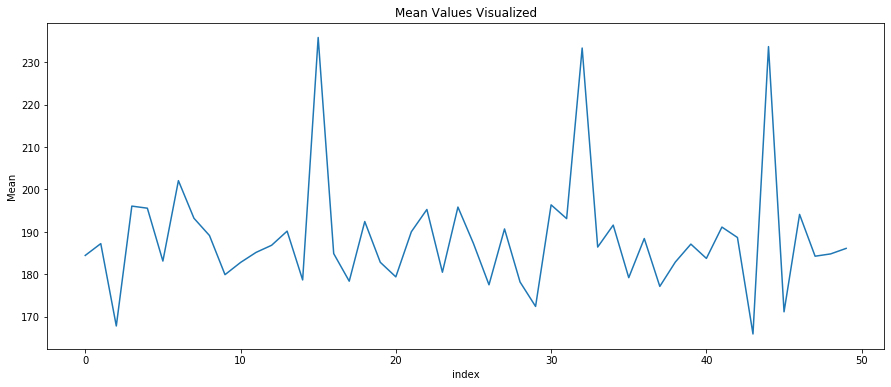

In [11]:
#For Visualizing 
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(range(50), Means)
plt.title('Mean Values Visualized')
plt.ylabel('Mean')
plt.xlabel('index')
plt.show()

In [10]:
import statistics

print('Mean of MSE: ',statistics.mean(Means))
print('Std of MSE: ',statistics.stdev(Means))

Mean of MSE:  188.47944574251144
Std of MSE:  13.874209204112752


Mean of MSE decreased but Std of MSE decreased